In [117]:
import yfinance as yf
import pandas as pd
data0 = yf.download("AAPL", start="2013-01-01", end="2025-07-4")
print(data0.head())


C:\Users\Mohamed Saber\AppData\Local\Temp\ipykernel_12276\2584327054.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data0 = yf.download("AAPL", start="2013-01-01", end="2025-07-4")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2013-01-02  16.647182  16.828200  16.422808  16.792421  560518000
2013-01-03  16.437054  16.666584  16.403701  16.612309  352965200
2013-01-04  15.979206  16.331841  15.943730  16.281507  594333600
2013-01-07  15.885221  16.048954  15.621428  15.827611  484156400
2013-01-08  15.927968  16.127481  15.804866  16.046221  458707200


In [102]:
# Create features (inputs) and target (output)
data0['Lag1'] = data0['Close'].shift(1)  # Previous day's close
features = ['Open', 'High', 'Low', 'Volume', 'Lag1']
data0 = data0.dropna()  # Remove rows with NaN

X = data0[features]
y = data0['Close']

In [103]:
X.head()

Price,Open,High,Low,Volume,Lag1
Ticker,AAPL,AAPL,AAPL,AAPL,
Date,,,,,
2013-01-03,16.612309,16.666584,16.403701,352965200,16.647182
2013-01-04,16.281507,16.331841,15.943730,594333600,16.437054
2013-01-07,15.827611,16.048954,15.621428,484156400,15.979206
2013-01-08,16.046221,16.127481,15.804866,458707200,15.885221
2013-01-09,15.842763,15.918870,15.645373,407604400,15.927968


In [107]:
X.iloc[:1]

Price,Open,High,Low,Volume,Lag1
Ticker,AAPL,AAPL,AAPL,AAPL,
Date,,,,,
2013-01-03,16.612309,16.666584,16.403701,352965200,16.647182


In [108]:
y.head()

Ticker,AAPL
Date,
2013-01-03,16.437054
2013-01-04,15.979206
2013-01-07,15.885221
2013-01-08,15.927968
2013-01-09,15.679030


In [109]:
data0.isnull().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
Lag1              0
dtype: int64

In [110]:
data0[data0.duplicated()]

Price,Close,High,Low,Open,Volume,Lag1
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,
Date,,,,,,


In [112]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.12,random_state=42,shuffle=False)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(2766, 5) (2766, 1)
(378, 5) (378, 1)


In [ ]:
from sklearn.linear_model import LinearRegression
lrModel=LinearRegression()
lrModel.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [130]:
train_preds=lrModel.predict(x_train).ravel()
print(train_preds[2])
print(y_train.iloc[:1])


15.810469247210627
Ticker           AAPL
Date                 
2013-01-03  16.437054


In [139]:
comparison = pd.DataFrame({
    'Predicted': train_preds,
    'Actual': y_train['AAPL']
}, index=y_train.index)

print(comparison.head())

            Predicted     Actual
Date                            
2013-01-03  16.471880  16.437054
2013-01-04  16.000770  15.979206
2013-01-07  15.810469  15.885221
2013-01-08  15.913898  15.927968
2013-01-09  15.720866  15.679030


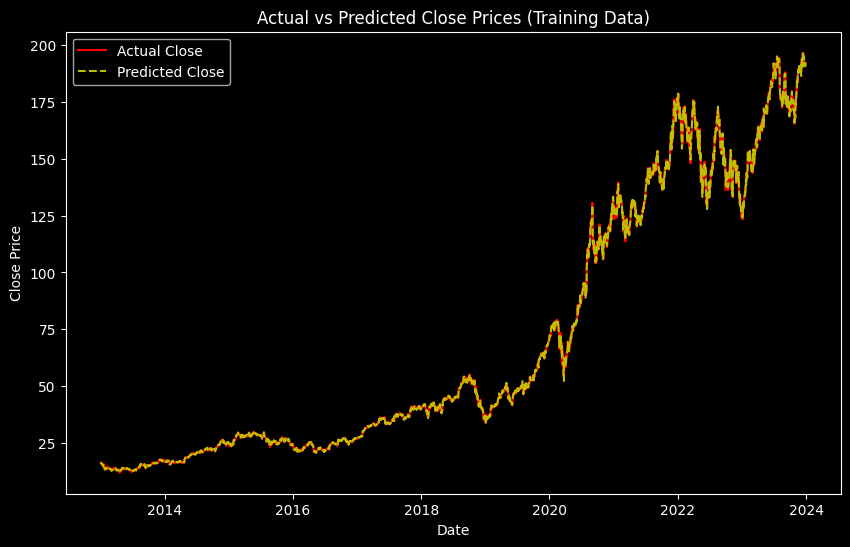

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(comparison.index, comparison['Actual'], label='Actual Close', color='r')
plt.plot(comparison.index, comparison['Predicted'], label='Predicted Close', color='y', linestyle='--')
plt.title('Actual vs Predicted Close Prices (Training Data)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [144]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
mse_tr=mean_squared_error(train_preds,y_train)
mae_tr=mean_absolute_error(train_preds,y_train)
r2_tr=r2_score(train_preds,y_train)
print('mse = ',mse_tr)
print('mae = ',mae_tr)
print('r2_score = ',r2_tr)

mse =  0.32963796393691813
mae =  0.3263177902858425
r2_score =  0.9998964931548074


In [145]:
from sklearn.model_selection import cross_val_score
cvs=cross_val_score(lrModel,x_train,y_train,cv=4)
cvs

array([0.99953617, 0.99955764, 0.99947568, 0.9973566 ])

In [146]:
test_preds=lrModel.predict(x_test)


In [147]:
mse_ts=mean_squared_error(test_preds,y_test)
mae_ts=mean_absolute_error(test_preds,y_test)
r2_ts=r2_score(y_test,y_test)
print('mse = ',mse_ts)
print('mae = ',mae_ts)
print('r2_score = ',r2_ts)

mse =  1.7268749568878639
mae =  0.9617425091668879
r2_score =  1.0


In [149]:
import joblib
finnModle=joblib.dump(lrModel,'final_model.pkl')